# PHYS 381 midterm 2017

A proton is located at the origin ${\vec r}_1 = (x=0,y=0,z=0)$ in a Cartesian coordinate system.

A positron (electron with positive charge) is located at ${\vec r}_2 = (x=-L,y=b,z=0)$ with velocity ${\vec v}_2 = (x=v_0,y=0,z=0)$.  

We want to examine the motion of the positron using numerical integration of the Coulomb force 
  
  $$\vec F = k \frac{q_1 q_2}{r^2} {\hat r}_{12} $$

and, when possible, compare these results to theory.

For this question, $m_1 >> m_2$ so we can make the simplifying assumption that the proton is fixed at the origin.

In general, the force on the positron will initially be very small, may increase as the charges approach, and will eventually become very small again as the separation increases.

The quantity $b$ is usually called the "impact parameter".  The angle between the initial velocity ${\vec v}_0$ and the final velocity vector is usually called the "scattering angle".

https://en.wikipedia.org/wiki/File:Impctprmtr.png

# Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import scipy.optimize


import scipy.integrate as integrate

## Closest approach

Assume that the positron initial conditions are $b=0$, $L=1~m$, and speed of $v=1000 m/s$ at $t=0$.  What is the smallest separation between the two charges and when does it occur?

## Closest approach : Solution (Theoretical)

First I will use the Principle of Conservation of energy to obtain the expected result. For a system that can be approximated with only potential energy and kinetic energy, Conservation of Energy states that total potential energy $PE$ plus the total kinetic energy $KE$ of the system is constant with respect to time. After an event or series of events that affect $PE$ and $KE$ of the system occur, the Conservation of energy can be restated as

$$PE_{initial}+KE_{initial}=PE_{final}+KE_{final}$$

For our particular system, the $PE$ and $KE$ are:
$$PE=\frac{kq_pq_e}{r}$$
$$KE=\frac{1}{2}m_ev_e^2$$
where  
$r=$ distance between the particles  
$q_p=$ charge of proton $(1.602*10^{-19} C)$  
$q_e=$ charge of positron $(1.602*10^{-19} C)$  
$v_e=$ speed of positron  
$m_e=$ mass of positron $(9.109*10^{-31} kg)$  
$k=$ Coulomb constant $(8.98755*10^9 N\frac{m^2}{C^2})$  
When the positron loses all of tis kinetic energy such that $v_e=0$, all of its kinetic energy is converted into potential energy. Therefore the closest distance $r_{closest}$ is a solution to the equation
$$\frac{kq_pq_e}{L}+\frac{1}{2}m_ev_e^2=\frac{kq_pq_e}{r_{closest}}$$
that yields
$$r_{cls,~theoretical}=0.0005061815343~m=5.0618*10^{-4}~m$$

## Closest approach : Solution (Numerical)

Newton's 2nd law states that the net force $\vec{F}$ on an object is proportional to the rate of change of momentum $\vec{p}$ with respect to time $t$.
$$\vec{F}=\left(\frac{d}{dt}\right)\vec{p}=\frac{d\vec{p}}{dt}$$
Note that because $\vec{F}$ and $\vec{p}$ are both vector quantities, their directions must also be identical as well as the magnitudes.  
Since momentum $p$ is $m$ times velocity $v$,
$$\vec{F}=\frac{d\vec{p}}{dt}=m\frac{d\vec{v}}{dt}$$
and ultimately equals mass times acceleration $\vec{a}$
$$\vec{F}=m\vec{a}$$
In our particular coordinate system and configuration of the system (oppositely charged), the direction of the electric force is always parallel and is in the direction of position vector of the positron from the origin (proton). So the net force acting on the positron is 
$$\vec{F}=\frac{kq_pq_e}{(x_e-x_p)^2}\hat{x_e}$$
where $x_e$ is the position of the positron and $x_p$ is the position of the proton.
Invoking Newton's 2nd law,
$$\vec{F}=\frac{kq_pq_e}{(x_e-x_p)^2}\hat{x_e}=m_e\vec{a}$$
So 
$$\vec{a}=\frac{kq_pq_e}{m_e(x_e-x_p)^2}\hat{x_e}$$
or equivalently,
$$\vec{a}=\frac{kq_pq_e}{m_e(\mid x_e-x_p\mid )^{3/2}}\vec{x_e}$$

This acceleration is the key ingredient in my approach to the problem. In the code below, I create a 'big' function called Closest_Distance that outputs the closest distance $r_{closest}$. Inside this function, there is a function (func_proton_positron) that takes state vector $[\vec{x},\vec{v}]=[position~of~positron, velocity~of~positron]$ and returns its derivative $[\vec{v},\vec{a}]=[velocity~of~positron, acceleration~of~positron]$. Then I use odeint that calls this function so that it returns a list of $[x,v]$ values under the effect of electric force $F$ above. Some plots are also created. Check the discussion.

Closest Distance= 0.00050618206647 m
Time at closest distance 0.00100176468806 s


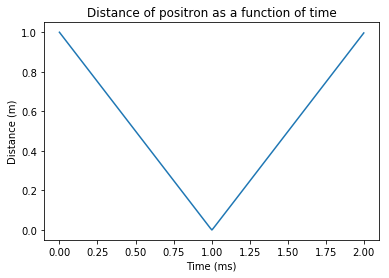

In [2]:
def Closest_Distance(initial_position,initial_velocity,number_steps):
    """
    first two arguments are trivial. number_steps indicate the quantity of intervals between time 0.0~0.0020.
    Results more accurate if this number is higher.
    """
    
    
    def func_proton_positron( state_vector, time):
        """
        This python function returns the time derivative of the state vector 
        for a motion of positron under the influence of proton's electric fields.  It can be called by
        an ODE integrator to determine the system trajectory.
        """

        #physical constants
        k=8.98755*10**9
        q_p=1.602*10**-19
        q_e=1.602*10**-19
        m_e=9.109*10**-31

        x, v = state_vector
        deriv = [v, (k*q_p*q_e)/(m_e*(x**2))*((x-0)/(abs(x)))] # [v,a] refer to above for expression of a. ((x-0)/(abs(x))) is used to find the direction. Which would always be in -x direction for this system.
        return deriv
        

    """
    The range for timesteps (0.0,0.002) below is specifically chosen based on the velocity of the positron (1000 m/s)
    For velocity<<<1000, this range may be too small.
    For velocity>1000, the range (0.0,0.002) is enough, but the interval (num=number_steps) must be high enough to capture
    the interaction between positron and proton.
    
    I could've generalized this to include all velocities, but since we are dealing with 1000m/s throughout the problem,
    I have limited the use of this function to just 1000m/s. 
    """
    timesteps = np.linspace(0.0, 0.002,num=number_steps)
    state_vector_initial = [initial_position,initial_velocity]
    state_vector_sequence = integrate.odeint( func_proton_positron, state_vector_initial, timesteps )
    
    
    
    """
    It's difficult to understand a plot that includes position and velocity on the same plot.
    Therefore I separe them into two lists and graph them individually.
    """
    position_list=[]
    velocity_list=[]
    for i in range (0,len(state_vector_sequence)):
        position_list.append(state_vector_sequence[i][0])
    for i in range (0,len(state_vector_sequence)):
        velocity_list.append(state_vector_sequence[i][1])
    
    #I append all position values from state_vector_sequence and use min function to find the smallest distance.
    #Since we're looking for distance, use absolute value of position.
    """
    Now I append all values of positions from state-vector_sequence into position_list and apply min function to it to obtain
    the smallest distance.
    Since this is a distance, I use absolute value.
    """
    position_list=[]
    
    
    for i in range (0,len(state_vector_sequence)):
        position_list.append(abs(state_vector_sequence[i][0]))
    
    print("Closest Distance=",min(position_list),"m")
    print("Time at closest distance",timesteps[position_list.index(min(position_list))],"s")
    time_step_nice=[]
    for i in range(0,len(timesteps)):
        time_step_nice.append(1000*timesteps[i])
    plt.plot(time_step_nice,position_list)
    plt.title("Distance of positron as a function of time")
    plt.ylabel("Distance (m)")
    plt.xlabel("Time (ms)")
    plt.show()
    
    
    
    
Closest_Distance(-1.0,1000.0,3234567)

<span style="color:red">
Summary of results: Now I have both theoretical and numerical values of closest distances. They are represented below:
</span>
$$r_{closest,~numerical}=0.00050618206647~m=5.061821*10^{-4}~m$$ $$r_{closest,~theoretical}=0.0005061815343~m=5.061815*10^{-4}~m$$
And the time taken to reach the closest distance is
$$=1.001765 *10^{-3} s$$
Plot of distance of positrion vs time is plotted to confirm that the minimum distance does occur approximately at the time of 0.001 s.

<span style="color:red">
The percent difference of the closest distances (numerical/theoretical) is calculated below
</span>

In [3]:
print("Percent Difference:",round(100*(0.00050618206647-0.0005061815343)/0.0005061815343,6),"%")

Percent Difference: 0.000105 %


This is a very small percent difference, so I claim that the two values are in close agreement.

## Deflection angle

Assume that the positron initial conditions are $b=1~mm$, $L=10~m$, and $v=1000 m/s$ at $t=0$.

Use numerical integration to get the positron acceleration, speed, location, deflection angle, and distance from the proton versus time. Make useful plots of these quantities.

What is the net change in kinetic energy of the positron between $t=0$ and $t=\infty$?

What is the deflection angle $\theta$ between the initial and final velocity vectors?

## Deflection angle : Solution (Theoretical)

Formula for impact parameter $b$ for our system can be found in http://hyperphysics.phy-astr.gsu.edu/hbase/Nuclear/impar.html and is given by
$$b=\frac{kq_pq_e}{2*KE_{e}}\sqrt{\frac{1+cos\theta}{1-cos\theta}}$$.
where  
$\theta=$ scattering angle  
$KE_{e}=$ initial kinetic energy of positron  
and other constants are defined earlier.  
  
  
   
It's a simple algebratic exercise to isolate for $\theta$ in the above equation.  
Define $Q:=\frac{k^2q_p^2q_e^2}{2^2KE_{e}^2}$,  
Then the scattering angle is
$$\theta=Arccos\left(\frac{b^2-Q}{Q+b^2}\right)$$
Based on these formulas, I now make functions that compute the impact parameter and the scattering angle with appropriate inputs.

In [4]:
def Impact_Parameter(velocity,S_Angle):
    k=8.98755*10**9
    q_p=1.602*10**-19
    q_e=1.602*10**-19
    m_e=9.109*10**-31
    KE=0.5*m_e*(velocity**2)
    return (k*q_p*q_e)/(2*KE)*math.sqrt((1+math.cos(S_Angle))/(1-math.cos(S_Angle)))

def Scatter_Angle(velocity,Impact_Parameter):
    k=8.98755*10**9
    q_p=1.602*10**-19
    q_e=1.602*10**-19
    m_e=9.109*10**-31
    KE=0.5*m_e*(velocity**2)
    Q=(k**2*q_p**2*q_e**2)/(4*KE**2)
    b=Impact_Parameter
    return math.acos((b**2-Q)/(Q+b**2))

<span style="color:red">
I need to check that the two functions defined are inverse of the other.
</span> 


Therefore I perform
$$Impact~Parameter(~Scattering~Angle~(b)~)$$
and see if I get $b$ back. Here, my $b$ is 0.001 m.

In [5]:
print(Impact_Parameter(1000,Scatter_Angle(1000,0.001)),"m")

0.001 m


The result is satisfactory, I get exactly $0.001 m$ back.  
Now that the two functions are working as intended, I find the scattering angle corresponding to $b=1mm$

In [6]:
print("Scatter angle at impact parameter b @ 1mm :",Scatter_Angle(1000,0.001),"radian")

Scatter angle at impact parameter b @ 1mm : 0.49601130536049615 radian



This theoretical scattering angle (0.4960113 radian) will be compared to the numerical scattering angle I am about to calculate.


## Deflection angle : Solution (Numerical)

With a non-zero impact parameter, the problem requires at least 2 dimensions. This time, the state vector would require more variables. It needs to contain information of position and velocity of both $x,y$ components. So define
$$state~vector:=[x,v_x,y,v_y]$$
where $x,y$ are positions and $v_x,v_y$ are velocities of of each x,y components respectively. Other than the state vector possessing two extra compoents, this function I'm about to create to find the deflection angle is very similar to the Closest_Distance function from previous problem.

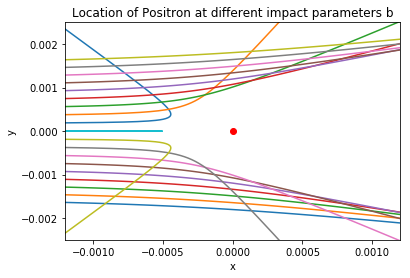

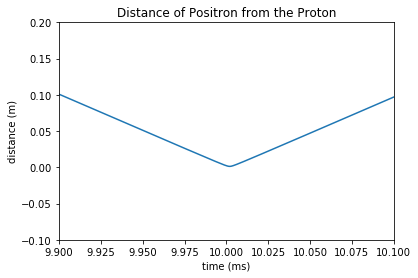

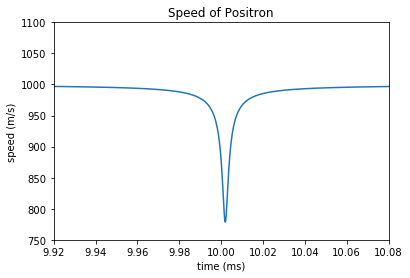

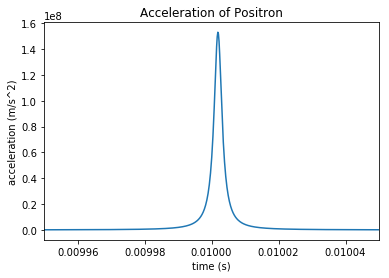

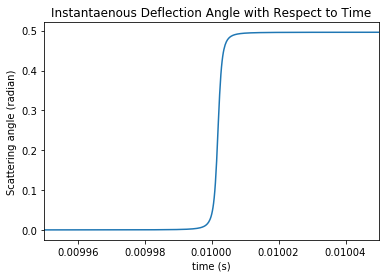

final speed:  1000.0218999132402  m/s
Numerical Scattering angle:  0.4959991080544474  radian


In [7]:
def Def_Angle(xi,v_xi,yi,v_yi,number_steps,plot_yn):
    """
    arguments= (initial position of x, initial velocity of x, ini pos of y, ini vel of y
                , number of time intervals in range 0.0 ~ 0.020 (results more accurate if larger)  , *generate plot or not (1 if yes, else if no) )  
    
    *see code below
    """
    def func_proton_positron( state_vector, time):
        """
        This python function returns the time derivative of the state vector 
        for a motion of positron under the influence of proton's electric fields.  It can be called by
        an ODE integrator to determine the system trajectory.
        """

        #physical constants
        k=8.98755*10**9
        q_p=1.602*10**(-19)
        q_e=1.602*10**(-19)
        m_e=9.109*10**(-31)
        
        x,v_x,y,v_y = state_vector
        deriv = [v_x, (k*q_p*q_e)/(m_e*(x**2+y**2)**(3/2))*(x-0),v_y, (k*q_p*q_e)/(m_e*(x**2+y**2)**(3/2))*(y-0)] # [v,a] refer to above for expression of a. ((x-0)/(abs(x))) is used to find the direction. Which would always be in -x direction for this system.
        return deriv

    """
    The range for timesteps (0.0,0.090) below is specifically chosen based on the velocity of the positron (1000 m/s)
    For velocity<<<1000, this range may be too small.
    For velocity>1000, the range (0.0,0.090) is enough, but the interval (num=number_steps) must be high enough to capture
    the interaction between positron and proton.
    
    I could've generalized this to include all velocities, but since we are dealing with 1000m/s throughout the problem,
    I have limited the use of this function to just 1000m/s. 
    """
    timesteps = np.linspace(0.0, 0.090,num=number_steps)
    state_vector_initial = [xi,v_xi,yi,v_yi]
    state_vector_sequence = integrate.odeint( func_proton_positron, state_vector_initial, timesteps )


    """
    This section appends appropriate quantities of statevector into lists representing speed, location, acceleration etc..
    """
    x=[]
    y=[]
    for i in range(0,len(state_vector_sequence)):
        x.append(state_vector_sequence[i][0])
    for i in range(0,len(state_vector_sequence)):
        y.append(state_vector_sequence[i][2])
    
    """
    codes below consume significant amounts of time to compute. Since I will use this function later but do not need quantities below,
    I made an extra argument that decides whether to run it or not.
    """    
    if plot_yn==1:
        v_x=[]
        v_y=[]
        a_x=[]
        a_y=[]
        speed=[]
        acceleration=[]
        distance=[]
        inst_scattering_angle=[]
        SVS=state_vector_sequence
        
        for i in range(0,len(SVS)):
            v_x.append(SVS[i][1])
        for i in range(0,len(SVS)):
            v_y.append(SVS[i][3])
        for i in range(0,len(SVS)-1):
            a_x.append((v_x[i+1]-v_x[i])/(timesteps[i+1]-timesteps[i]))
        for i in range(0,len(SVS)-1):
            a_y.append((v_y[i+1]-v_y[i])/(timesteps[i+1]-timesteps[i])) 
        for i in range(0,len(SVS)):
            distance.append(math.sqrt(SVS[i][0]**2+SVS[i][2]**2))
        for i in range(0,len(SVS)):
            speed.append(math.sqrt(v_x[i]**2+v_y[i]**2))
        for i in range (0,len(SVS)-1):
            acceleration.append(math.sqrt(a_x[i]**2+a_y[i]**2))
        for i in range (0,len(SVS)-1):
            inst_scattering_angle.append(math.atan((y[i+1]-y[i])/(x[i+1]-x[i])))
        
        
        #plt.plot( x, y)
        plt.title("Location of Positron at different impact parameters b")
        plt.ylabel("y")
        plt.xlabel("x")
        plt.plot([0],[0],'or')
        for i in np.linspace(-0.0015,0.0015,num=19):
            timesteps_plot = np.linspace(0.0, 0.020,num=number_steps) #given the initial condition, we know that minimum distance is reached at very small time.
            state_vector_initial = [xi,v_xi,i,v_yi]
            state_vector_sequence = integrate.odeint( func_proton_positron, state_vector_initial, timesteps_plot )

            x_plot=[]
            y_plot=[]
            for i in range(0,len(state_vector_sequence)):
                x_plot.append(state_vector_sequence[i][0])
            for i in range(0,len(state_vector_sequence)):
                y_plot.append(state_vector_sequence[i][2])
            plt.plot(x_plot,y_plot)
            plt.ylim(-0.0025,0.0025)
            plt.xlim(-0.0012,0.0012)
        plt.show()
        
        
        timesteps_list=timesteps.tolist()
        timesteps_list.pop()
        
        
        timesteps_new=[]
        for i in range(0,len(timesteps)):
            timesteps_new.append(1000*timesteps[i])
        
        plt.plot( timesteps_new, distance)
        plt.title("Distance of Positron from the Proton")
        plt.ylabel("distance (m)")
        plt.xlabel("time (ms)")
        plt.xlim([1000*0.0099,1000*0.0101])
        plt.ylim(-0.1,0.2)
        plt.show()
        
        plt.plot( timesteps_new, speed)
        plt.title("Speed of Positron")
        plt.ylabel("speed (m/s)")
        plt.xlabel("time (ms)")
        plt.xlim([1000*0.00992,1000*0.01008])
        plt.ylim(750,1100)
        plt.show()
        
        
        plt.plot( timesteps_list, acceleration)
        plt.title("Acceleration of Positron")
        plt.ylabel("acceleration (m/s^2)")
        plt.xlabel("time (s)")
        plt.xlim([0.00995,0.01005])
        plt.show()
        
        plt.plot( timesteps_list, inst_scattering_angle)
        plt.title("Instantaenous Deflection Angle with Respect to Time")
        plt.ylabel("Scattering angle (radian)")
        plt.xlabel("time (s)")
        plt.xlim(0.00995,0.01005)
        plt.show()
        print("final speed: ",math.sqrt(v_x[-1]**2+v_y[-1]**2)," m/s")
        
        
        
    """
    This section calculates the scattering angle.
    First I make sure the slope has approached a constant value and the positron is no longer interacting with the proton
    Then scattering angle is calculated based on which quadrant the constant slope lies in.
    """
    Scattering_Angle=0.0
    if y[-1]-y[-2]==0:
        Scattering_Angle=0.0
    elif y[-1]-y[-2]<=abs(0.01) and x[-1]-x[-2]<=abs(0.01) and y[-1]>=0.0 and x[-1]>=0.0: #first quadrant
        Scattering_Angle=math.atan((y[-1]-y[-3])/(x[-1]-x[-3]))
    elif y[-1]-y[-2]<=abs(0.01) and x[-1]-x[-2]<=abs(0.01) and y[-1]>=0.0 and x[-1]<=0.0: #second quadrant
        Scattering_Angle=math.pi-math.atan(abs((y[-1]-y[-2])/(x[-1]-x[-2])))
    elif y[-1]-y[-2]<=abs(0.01) and x[-1]-x[-2]<=abs(0.01) and y[-1]<=0.0 and x[-1]>=0.0: #fourth quadrant
        Scattering_Angle=math.atan((y[-1]-y[-2])/(x[-1]-x[-2]))
    elif y[-1]-y[-2]<=abs(0.01) and x[-1]-x[-2]<=abs(0.01) and y[-1]<=0.0 and x[-1]<=0.0: #third quadrant
        Scattering_Angle=-(math.pi-math.atan(abs((y[-1]-y[-2])/(x[-1]-x[-2]))))
    else:
        #increase number_steps if this message is seen
        print("Warning: positron is still under the influence of electric field. Try larger number_steps")
        print("x:",x[-1],"y:",y[-1])
    
    return Scattering_Angle
    
    
    
    
print("Numerical Scattering angle: ",Def_Angle(-10.0,1000,0.001,0.0,494567,1)," radian")

The final speed deviated very slightly from the intial speed (1000 m/s). The initial/final kinetic energies are

In [8]:
ki=0.5*9.109*10**-31*1000**2
kf=0.5*9.109*10**-31*1000.0218999**2
print("Initial KE of Positron= ",ki," J")
print("Final KE of Positron= ",kf," J")
print("Net change in Kinetic energy= ",kf-ki, " J")

Initial KE of Positron=  4.5545e-25  J
Final KE of Positron=  4.554699488373464e-25  J
Net change in Kinetic energy=  1.9948837346333716e-29  J


The percent difference of initial and final kinetic energies is:

In [9]:
print(100*abs((ki-kf)/(ki)),"%")

0.004380027960551918 %


Since the final kinetic energy is not likely to change over time as the positron is sufficiently far away, I take the final kinetic energy to be the kinetic energy at $t\rightarrow \infty$.

The kinetic energy has gained a small kinetic energy ( ~ $0.2 mJ$). This extra energy comes from the fact that the initial potential energy of positron is small but not negligible. That initial potential energy gets converted into kinetic energy when the particle is very far away ($t\rightarrow \infty$)  Quick calculation on paper shows that we expect the final kinetic energy of the positron to be $1000.03~m/s$. I conjecture the deviation of the numerical value ($1000.022~m/s$) from the theoretical ($1000.03~m/s$) occurs because of the combination of the time domain in my function not being large enough and the time interval being not small enough. But I do not wish to change the current time domain and interval because it may decrease the quality of the plot as well as decreasing the computation efficiency. This time intervals and domain are specifically chosen (after some trial and error) to maximize computation efficiency and accuracy for the future problem that use this function for the purpose of calculation of impact parater for a given scattering angle.


As for the deflection angle between initial and final velocity (aka, scattering angle S), The numerical and theoretical values obtained earlier are as follows
$$S_{numerical}=0.495999083~radian$$
$$S_{theoretical}=0.496011305~radian$$

With a percent difference of

In [10]:
print(100*abs((0.495999083-0.496011305)/(0.496011305)),"%")

0.002464056741611196 %


The percent difference seems relatively small enough to claim the program has ran successfully.

Inspecting the generated plots contain no big surprises. Note that the domain has been adjusted so that it's easy to see the major changes within the plots, but the rest of the plots can be easily be extrapolated with the slopes at the edge of the plots as nothing special happens outside those chosen domains. Qualitatively examining the acceleration, velocity, and position seem to support the relationships $a=\frac{dv}{dt}$, $v=\frac{d(distance)}{dt}$ as well as showing characteristics of elastic collision between likely charged particles. Some observations are:  
1. distance decreases and rises up symmetrically about the time of collision (~0.01 s)
2. speed (kinetic energy) decreases when potential energy between particles increase, and increases when potential energy decrease.  
3. Non-negligible force (acceleration) is only present when the distance betweehm the particles are small.  
4. Instantaneous deflection angle abruptly increase at the time of collision and approach a constant value (scattering angle) as expected.
5. Locations of positron at 19 different angles are also plotted. The impact parameter corresponding to each line can be determined form the initial y values on the left boundary of the plot. This plot nicely represents the deflection pattern for each distinct impact parameter.

## Figures

Plot scattering angles for 1000 m/s positrons over appropriate ranges of $b$ values.  
Plot impact parameters for 1000 m/s positrons over appropriate ranges of $\theta$ values.  
Try to make these figures informative and useful.

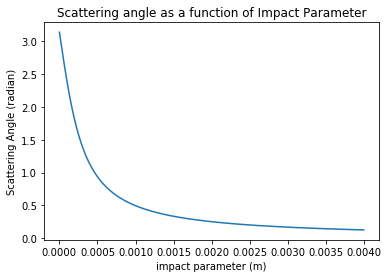

Maximum Scattering Angle:  3.140802800367059  radian


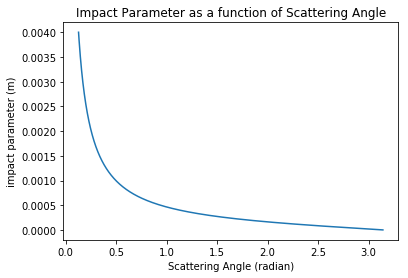

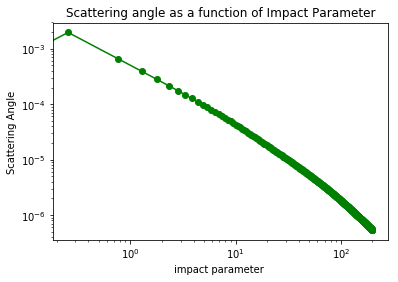

Maximum Scattering Angle:  0.0019721931705360064  radian


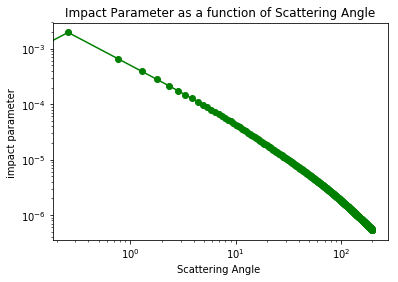

In [11]:
def Scatter_Impact_plot(log_yn):
    #set log_yn if wish to plot logplot. else if not
    Scattering_Angle_list=[]
    
    if log_yn==1:
        ip_list=np.linspace(-200,200,num=780)
    else:
        ip_list=np.linspace(0.0000001,0.004,num=680) #0.0000001 is chosen as low limit to capture pi as a scattering angle
    if log_yn==1:
        for i in ip_list:
            Scattering_Angle_list.append(Def_Angle(-10.0,1000.0,float(i),0.0,9400,0))
        plt.title("Scattering angle as a function of Impact Parameter",)
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel("Scattering Angle")
        plt.xlabel("impact parameter ")
        plt.plot( ip_list, Scattering_Angle_list,'go-')
        plt.show()
    else:
        for i in ip_list:
            Scattering_Angle_list.append(Def_Angle(-10.0,1000.0,float(i),0.0,9400,0))
        plt.title("Scattering angle as a function of Impact Parameter")
        plt.ylabel("Scattering Angle (radian)")
        plt.xlabel("impact parameter (m)")
            
        plt.plot( ip_list, Scattering_Angle_list,)
        plt.show()
    print("Maximum Scattering Angle: ",max(Scattering_Angle_list)," radian")

    Scattering_Angle_list=[]
    
    if log_yn==1:
        ip_list=np.linspace(-200,200,num=780)
    else:
        ip_list=np.linspace(0.0000001,0.004,num=680)
    
    if log_yn==1:
        for i in ip_list:
            Scattering_Angle_list.append(Def_Angle(-10.0,1000.0,float(i),0.0,9400,0))
        plt.title("Impact Parameter as a function of Scattering Angle")
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Scattering Angle ")
        plt.ylabel("impact parameter ")
        plt.plot( ip_list, Scattering_Angle_list,'go-')
        plt.show()
    else:
        for i in ip_list:
            Scattering_Angle_list.append(Def_Angle(-10.0,1000.0,float(i),0.0,9400,0))
        plt.title("Impact Parameter as a function of Scattering Angle")
        plt.xlabel("Scattering Angle (radian)")
        plt.ylabel("impact parameter (m)")
        
        plt.plot( Scattering_Angle_list, ip_list)
        plt.show()
Scatter_Impact_plot(0)
Scatter_Impact_plot(1)

Total of 4 plots are created. The first two plots show the regions where the relationship between scattering angle and impact parameter are easy to spot. However, it just feels wrong to not include the entire plot as it is not perfectly trivial to extrapolate the behavior of the system from the first two plots unlike the previous plots of speed,distances, etc.
Therefore the last two plots are created using log scale(base e). It does show a wider range of impact parameter and scattering values, but it comes at a cost of reduced intuition about the behavior system.

## Impact parameter $b(\theta)$

Write a python function to calculate the impact parameter for a given scattering angle.  Use this function to determine $b$ for $\theta=45^\circ$ and $\theta=90^\circ$.  Hint: it may be helpful to think about this as a root-finding problem.

I approach this problem by 'reverse engineering'. See the plot generated below. The function I use to generate the plot is the same function as the Def_Angle from part(2): 'Deflection Angle' with a different initial state vector and reduced number of plots. Therefore I removed all comments within.

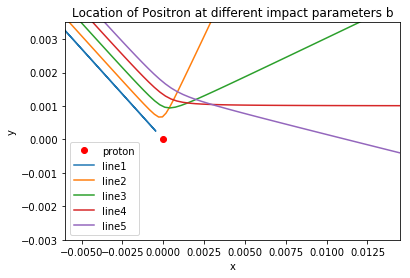

In [12]:

def Def_Angle_for_plot(xi,v_xi,yi,v_yi,number_steps,plot_yn):
    def func_proton_positron( state_vector, time):
        
        #physical constants
        k=8.98755*10**9
        q_p=1.602*10**(-19)
        q_e=1.602*10**(-19)
        m_e=9.109*10**(-31)
        
        x,v_x,y,v_y = state_vector
        deriv = [v_x, (k*q_p*q_e)/(m_e*(x**2+y**2)**(3/2))*(x-0),v_y, (k*q_p*q_e)/(m_e*(x**2+y**2)**(3/2))*(y-0)] # [v,a] refer to above for expression of a. ((x-0)/(abs(x))) is used to find the direction. Which would always be in -x direction for this system.
        return deriv

    timesteps = np.linspace(0.0, 0.090,num=number_steps)
    state_vector_initial = [xi,v_xi,yi,v_yi]
    state_vector_sequence = integrate.odeint( func_proton_positron, state_vector_initial, timesteps )
    
    x=[]
    y=[]
    for i in range(0,len(state_vector_sequence)):
        x.append(state_vector_sequence[i][0])
    for i in range(0,len(state_vector_sequence)):
        y.append(state_vector_sequence[i][2])
    return [x,y]
    
    
plt.title("Location of Positron at different impact parameters b")
plt.ylabel("y")
plt.xlabel("x")
plt.plot([0],[0],'or',label="proton")
plt.xlim([-0.0060,0.0145])
plt.ylim(-0.0030,0.0035)
n=1
for i in np.linspace(0.000,(4/3)*0.0021012,num=5):
    plt.plot(Def_Angle_for_plot(-10.0*math.cos(0.496)+i,1000*math.cos(0.496),10.0*math.sin(0.496),-1000*math.sin(0.496),199407,1)[0],Def_Angle_for_plot(-10.0*math.cos(0.496)+i,1000*math.cos(0.496),10.0*math.sin(0.496),-1000*math.sin(0.496),199407,1)[1],label="line"+str(n))
    n=n+1
    plt.legend()
plt.show()


This time, instead of sending the particle at zero slope (dy/dx), I send them at an angle corresponding to the desired scattering angle while initial position and velocity are found using basic trigonometry using that angle. As shown above, positron sent along line 1 gets sent straight back without any scattering. However, shifting the line 1 to the right changes the scattering angles depending on the amount of distance shifted. At a certain distance shifted, the final slope of the line would approach zero like line 5. Then I can find the desired impact parameter using this particular distance through basic trigonometry and geometry of the scattering of a particle. This geometrical argument can easily be seen on http://hyperphysics.phy-astr.gsu.edu/hbase/rutsca.html ('Alpha Scattering Geometry'). In that picture, the scattering of a particle seem to 'preserve' the impact parameter so that the impact parameter is well defined before and after the scatter with respect to the line drawn based on the the location of the target nucleus (proton).

Using this approach, I created Find_Impact_Parameter function that computes the impact parameter for a given scattering angle with extra arguments (bmin,bmax,tol) where bmin bmax denote the range of impact parameter values that contains the desired impact parameter for a given scattering angle, and tol is the tolerance value for computation acuracy. Lower the tolerance, more accurate the output. This function utilizes 'hexa-section' method where it initially create 6 evenly spaced values in a given range (bmin,bmax), and then find two values (one positive, one negative) that are closest to zero (to find zero slope), in which they become the new range to be split into 6 values, and so on recursively (but not really a recursive function) until the accuracy is below the tolerance. The decision to split the range into 6 evenly spaced values is made through time-optimization.

In [13]:
def Find_Impact_Parameter(S,bmin,bmax,tol): # S= scattering angle between 0 and 360
    
    accuracy=10.0
    Warning=0.0 # prevent the function from running too long
    begin=time.time() # begin time measurement
    displacement=np.linspace(bmin/math.sin(S),bmax/math.sin(S),num=6)
    
    while accuracy>=tol:
        Warning=Warning+1
        if Warning>=100:
            print("Too many iterations. Try smaller bmin and bmax")
            break
        
        inspect_list=[]
        
        
        for i in displacement:
            inspect_list.append(Def_Angle(-10*math.cos(S)+i,1000*math.cos(S),10*math.sin(S),-1000*math.sin(S),9400,0))
        positive_min=min(i for i in inspect_list if i>0) # find the smallest positive num
        negative_max=max(i for i in inspect_list if i<0) # find the largest negative num.
        # together, it finds one positive, one ngeative values that are closest to zero.
        
        #define new range to be split into 6 values
        positive_min_index=inspect_list.index(positive_min)
        negative_max_index=inspect_list.index(negative_max)
        displacement=np.linspace(displacement[negative_max_index],displacement[positive_min_index],num=6)
        accuracy=positive_min #this could've been negative_max too. It's arbitrary.
        


        
    end=time.time() # end time measurement
    #print("time elapsed: ",end-begin," seconds")
    if S==0:
        return 9999999999999 # impact parameter for zero scattering angle is 0
    elif S==math.pi: 
        return 0 # impact parameter for scattering angle of pi is 0
    else:
        return math.sin(S)*displacement[inspect_list.index(accuracy)]
    
def percent_difference(numerical,theoretical):
    if numerical==0:
        return 0
    if theoretical==0:
        return numerical
    else:
        return 100*abs((numerical-theoretical)/theoretical)

I have spent some time optimizing this function to get the most accurate result while comsuming minimal time. The best result I managed to obtain thus far is average time consumption of about 1 second for tol value of $0.000001$. To see how accurate the results are, see the table below.

Now I make a list of numerical/theoretical impact parameter w.r.t various scattering angles including pi/4,pi/2

In [14]:
begin=time.time()
print ('%-25s%-35s%-40s%-30s' % ('Scattering Angle (rad)','Impact Parameter(numerical) e-3m','Impact Parameter(theoretical) e-3m','percent difference (%)'))
print ('%-25s%-35f%-40f%-30f' % ('pi/2',1000*Find_Impact_Parameter(math.pi/2,0.0,0.1,0.00001),1000*Impact_Parameter(1000,math.pi/2),percent_difference(Find_Impact_Parameter(math.pi/2,0.0,0.01,0.00001),Impact_Parameter(1000,math.pi/2))))
print ('%-25s%-35f%-40f%-30f' % ('pi/4',1000*Find_Impact_Parameter(math.pi/4,0.0,0.1,0.00001),1000*Impact_Parameter(1000,math.pi/4),percent_difference(Find_Impact_Parameter(math.pi/4,0.0,0.01,0.00001),Impact_Parameter(1000,math.pi/4))))
print ('%-25s%-35f%-40f%-30f' % ('0.496',1000*Find_Impact_Parameter(0.496,0.0,0.1,0.00001),1000*Impact_Parameter(1000,0.496),percent_difference(Find_Impact_Parameter(0.496,0.0,0.1,0.00001),Impact_Parameter(1000,0.496))))
temparray=np.linspace(0.01,math.pi-0.01,num=10)
for i in temparray:
    print ('%-25s%-35f%-40f%-30f' % (str(round(i,5)),1000*Find_Impact_Parameter(i,0.0,0.1,0.00000001),1000*Impact_Parameter(1000,i),percent_difference(Find_Impact_Parameter(i,0.0,0.1,0.00000001),Impact_Parameter(1000,i))))
end=time.time()
print("Total time elapsed: ",end-begin," seconds")

Scattering Angle (rad)   Impact Parameter(numerical) e-3m   Impact Parameter(theoretical) e-3m      percent difference (%)        
pi/2                     0.253212                           0.253219                                0.001541                      
pi/4                     0.611307                           0.611324                                0.000156                      
0.496                    0.999997                           1.000024                                0.002631                      
0.01                     50.639872                          50.643302                               0.006774                      
0.35684                  1.404084                           1.404121                                0.002633                      
0.70369                  0.689726                           0.689745                                0.002699                      
1.05053                  0.436892                           0.436904               

As shown above, it handles scattering angle values very close to 0 or pi with no issue as long as tol value is sufficiently low . This 13 intense computations were done in 21 seconds with significantly low tol value of $0.00000001$

Below is a function that does the same job (finding impact paratmeter for a given scattering angle), but using built-in root finding algorithm: scipy.optimize.fsolve. Ideally I would use brentq, but I could not find a quick solution to get around the fact that is requires the sign of function at two endpoints to have the opposite sign. That being said, below is the table of result similar to the table above.

In [15]:
def find_impact_parameter_root(S):
    """
    This function runs built-in root finding function fsolve to my Def_Angle.
    """
    def myfunc(b):
        return S-Def_Angle(-10,1000,b,0,90400,0)
    return scipy.optimize.fsolve(myfunc,0.0005)


begin=time.time()
temparray=np.linspace(0.01,math.pi-0.01,num=10)
print ('%-25s%-35s%-40s%-30s' % ('Scattering Angle (rad)','Impact Parameter(numerical) e-3m','Impact Parameter(theoretical) e-3m','percent difference (%)'))

print ('%-25s%-35f%-40f%-30f' % ('pi/2',1000*find_impact_parameter_root(math.pi),1000*Impact_Parameter(1000,math.pi/2),percent_difference(find_impact_parameter_root(math.pi),Impact_Parameter(1000,math.pi/2))))
print ('%-25s%-35f%-40f%-30f' % ('pi/4',1000*find_impact_parameter_root(math.pi/4),1000*Impact_Parameter(1000,math.pi/4),percent_difference(find_impact_parameter_root(math.pi/4),Impact_Parameter(1000,math.pi/4))))
print ('%-25s%-35f%-40f%-30f' % ('0.496',1000*find_impact_parameter_root(0.496),1000*Impact_Parameter(1000,0.496),percent_difference(find_impact_parameter_root(0.496),Impact_Parameter(1000,0.496))))
for i in temparray:
    print ('%-25s%-35f%-40f%-30f' % (str(round(i,5)),1000*find_impact_parameter_root(i),1000*Impact_Parameter(1000,i),percent_difference(find_impact_parameter_root(i),Impact_Parameter(1000,i))))
end=time.time()
print("Total time elapsed: ",end-begin," seconds")

Scattering Angle (rad)   Impact Parameter(numerical) e-3m   Impact Parameter(theoretical) e-3m      percent difference (%)        
pi/2                     0.000000                           0.253219                                100.000000                    
pi/4                     0.611308                           0.611324                                0.002575                      
0.496                    0.999998                           1.000024                                0.002565                      
0.01                     50.641694                          50.643302                               0.003176                      
0.35684                  1.404085                           1.404121                                0.002564                      
0.70369                  0.689727                           0.689745                                0.002573                      
1.05053                  0.436893                           0.436904               

Overall, this fsolve function offers similar results in terms of accuracy (except the result at pi/2), but it takes approximately 10 more seconds to compute the same number of angles. One can argue that the 'estimation' argument of fsolve is not close enough to the actual value, but that is part of the limitation of the built-in fsolve function. Here, the function I built from scratch to find the impact paramter outperforms fsolve root finding. But I believe brentq would significantly outperform my function altogether if it is working properly.

# Conclusion

I have numerically computed some important physical properties of scatter of positron w.r.t proton at rest. I made reasonable comparison between my numerical results and theoretical results utilzing derivations and plots. Overall, the numerical results did not significantly deviate from the expected results.